## Menyatukan Colab dengan Cloud

Proses untuk menyatukan Google Colab dengan Google Cloud

In [166]:
from google.colab import auth    # import autentikasi dari google colab
auth.authenticate_user()         # autentikasi user google
print('Authenticated')           # jika berhasil akan muncul kalimat 'Authenticated'

from google.cloud import bigquery             # import bigquery dari google cloud
project_id = "hacktiv8-farhan-1"              # nama project id dari google cloud, pada bagian 'select a project', kolom 'ID'
client = bigquery.Client(project=project_id)  # membuat variabel client dari bigquery agar mempersingkat

Authenticated


# i - Query SQL
> Tulis query yang telah dibuat untuk mengambil data dari Google Cloud Platform di bagian ini.

In [167]:
# Membuat variabel BigQuery yang berisi tabel orders dari thelook_ecommerce
BigQuery = client.query ('''
SELECT
      age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket
      # Pilih HANYA kolom age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, dan income_bracket
FROM
      bigquery-public-data.ml_datasets.census_adult_income
WHERE
      workclass != ' ?' AND  # Pilih semua workclass, kecuali ?.
      hours_per_week < 100  # Pilih hours_per_week kurang dari 100.
Limit
      39960       # 20 (Batch) x 1998 (Tahun Lahir)

''').to_dataframe()

# Melihat tipe data BigQuery
BigQuery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30725 entries, 0 to 30724
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30725 non-null  Int64 
 1   workclass       30725 non-null  object
 2   education       30725 non-null  object
 3   education_num   30725 non-null  Int64 
 4   marital_status  30725 non-null  object
 5   occupation      30725 non-null  object
 6   relationship    30725 non-null  object
 7   race            30725 non-null  object
 8   sex             30725 non-null  object
 9   capital_gain    30725 non-null  Int64 
 10  capital_loss    30725 non-null  Int64 
 11  hours_per_week  30725 non-null  Int64 
 12  native_country  30725 non-null  object
 13  income_bracket  30725 non-null  object
dtypes: Int64(5), object(9)
memory usage: 3.4+ MB


In [168]:
# Menampilkan 10 data pertama
BigQuery.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
5,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
6,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
7,27,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,Portugal,<=50K
8,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
9,30,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,Portugal,<=50K


In [169]:
# Menampilkan 10 data terakhir
BigQuery.tail(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
30715,23,Private,Some-college,10,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,0,0,24,Vietnam,<=50K
30716,22,Private,Some-college,10,Never-married,Tech-support,Other-relative,Asian-Pac-Islander,Female,0,0,32,United-States,<=50K
30717,25,Private,Some-college,10,Never-married,Craft-repair,Other-relative,Asian-Pac-Islander,Female,0,0,40,Cambodia,<=50K
30718,22,Private,Some-college,10,Never-married,Craft-repair,Other-relative,Asian-Pac-Islander,Female,0,0,40,Vietnam,<=50K
30719,48,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Cambodia,>50K
30720,46,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
30721,45,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
30722,32,Private,Some-college,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece,<=50K
30723,30,Self-emp-not-inc,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South,<=50K
30724,20,Self-emp-not-inc,Some-college,10,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,Female,0,0,20,South,<=50K


# ii - Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [170]:
# Import Libraries

# Buat memproses data
import pandas as pd
import numpy as np

# Buat memproses grafik
import seaborn as sns
import matplotlib.pyplot as plt

# Buat Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score

# Buat definisi model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Buat evaluasi model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Buat import hasil model saving
import pickle
import json

# iii - Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [171]:
# Menampilkan dataFrame
BigQuery

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30720,46,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
30721,45,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
30722,32,Private,Some-college,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece,<=50K
30723,30,Self-emp-not-inc,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South,<=50K


# iv - Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Perbandingan pada setiap kolom

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, 

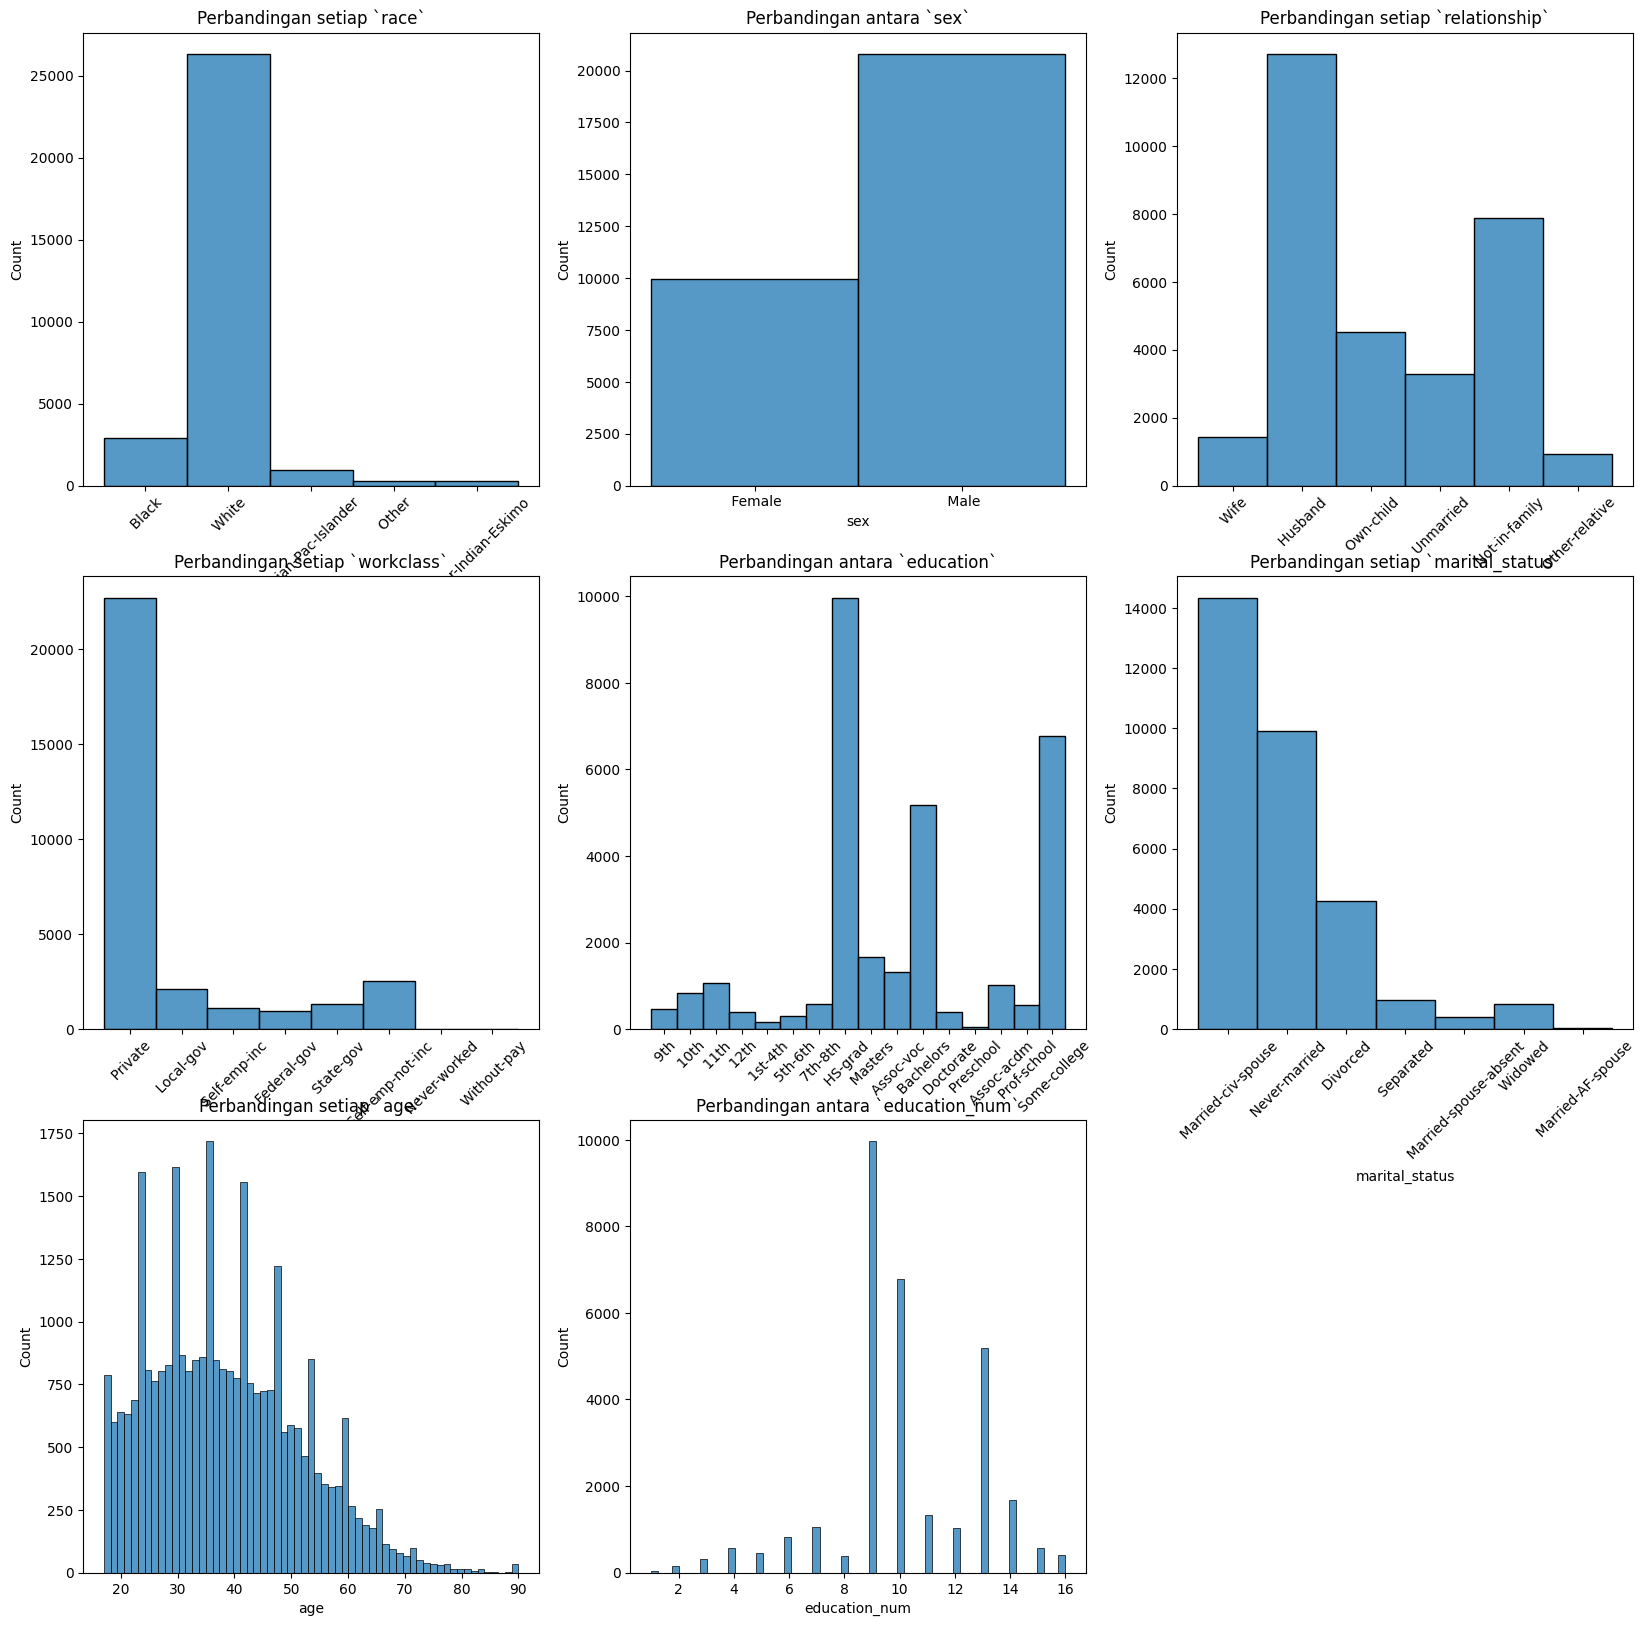

In [172]:
plt.figure(figsize = (20, 20))

ax1 = plt.subplot(3, 3, 1)
sns.histplot(data=BigQuery, x='race')
ax1 = plt.title ('Perbandingan setiap `race`')
plt.xticks(rotation=45)

ax2 = plt.subplot(3, 3, 2)
sns.histplot(data=BigQuery, x='sex')
ax2 = plt.title ('Perbandingan antara `sex`')

ax3 = plt.subplot(3, 3, 3)
sns.histplot(data=BigQuery, x='relationship')
ax3 = plt.title ('Perbandingan setiap `relationship`')
plt.xticks(rotation=45)

ax4 = plt.subplot(3, 3, 4)
sns.histplot(data=BigQuery, x='workclass')
ax1 = plt.title ('Perbandingan setiap `workclass`')
plt.xticks(rotation=45)

ax5 = plt.subplot(3, 3, 5)
sns.histplot(data=BigQuery, x='education')
ax2 = plt.title ('Perbandingan antara `education`')
plt.xticks(rotation=45)

ax6 = plt.subplot(3, 3, 6)
sns.histplot(data=BigQuery, x='marital_status')
ax3 = plt.title ('Perbandingan setiap `marital_status`')
plt.xticks(rotation=45)

ax7 = plt.subplot(3, 3, 7)
sns.histplot(data=BigQuery, x='age')
ax1 = plt.title ('Perbandingan setiap `age`')

ax8 = plt.subplot(3, 3, 8)
sns.histplot(data=BigQuery, x='education_num')
ax2 = plt.title ('Perbandingan antara `education_num`')

## Melihat cardinality

In [173]:
print('Shape of Dataset : ', BigQuery.shape)
print('')

for col in BigQuery.columns.tolist():
  print('Kolom : ', col)
  print('Jumlah Unique Value : ', BigQuery[col].nunique())
  print('')

Shape of Dataset :  (30725, 14)

Kolom :  age
Jumlah Unique Value :  72

Kolom :  workclass
Jumlah Unique Value :  8

Kolom :  education
Jumlah Unique Value :  16

Kolom :  education_num
Jumlah Unique Value :  16

Kolom :  marital_status
Jumlah Unique Value :  7

Kolom :  occupation
Jumlah Unique Value :  15

Kolom :  relationship
Jumlah Unique Value :  6

Kolom :  race
Jumlah Unique Value :  5

Kolom :  sex
Jumlah Unique Value :  2

Kolom :  capital_gain
Jumlah Unique Value :  118

Kolom :  capital_loss
Jumlah Unique Value :  90

Kolom :  hours_per_week
Jumlah Unique Value :  94

Kolom :  native_country
Jumlah Unique Value :  42

Kolom :  income_bracket
Jumlah Unique Value :  2



## Melihat perbandingan data antara <=50k dengan >50k

Text(0.5, 1.0, 'Perbandingan antara <=50k dengan >50k')

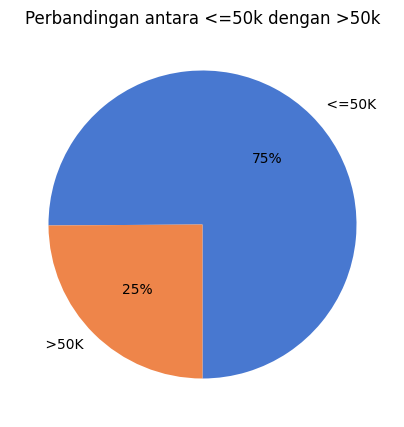

In [174]:
palette_color = sns.color_palette('muted')
plt.figure(figsize = (16, 5))

plt.pie(BigQuery.groupby(['income_bracket'])['native_country'].count(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=BigQuery['income_bracket'].unique())
plt.title ('Perbandingan antara <=50k dengan >50k')

# v - Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Split X (Features) dan y (Target)

In [175]:
X = BigQuery.drop(['income_bracket'], axis=1)
y = BigQuery['income_bracket']

print (X.shape)
print (y.shape)

(30725, 13)
(30725,)


## Split Train-Set dan Test-Set

In [176]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 1509)

print ('X Train Size', X_train.shape)
print ('X Test Size:', X_test.shape)
print ()
print ('y Train Size', y_train.shape)
print ('y Test Size:', y_test.shape)

X Train Size (24580, 13)
X Test Size: (6145, 13)

y Train Size (24580,)
y Test Size: (6145,)


## Handle Missing Value

### X_train
> Tidak adanya data null pada X_train

In [177]:
X_train.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

### X_test
> Tidak adanya data null pada X_test

In [178]:
X_test.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

### y_train
> Tidak adanya data null pada y_train

In [179]:
y_train.isnull().sum()

0

### y_test
> Tidak adanya data null pada y_test

In [180]:
y_test.isnull().sum()

0

## Handle Outlier

### Mengecek outlier pada `age`

Skewness Value age:  0.53


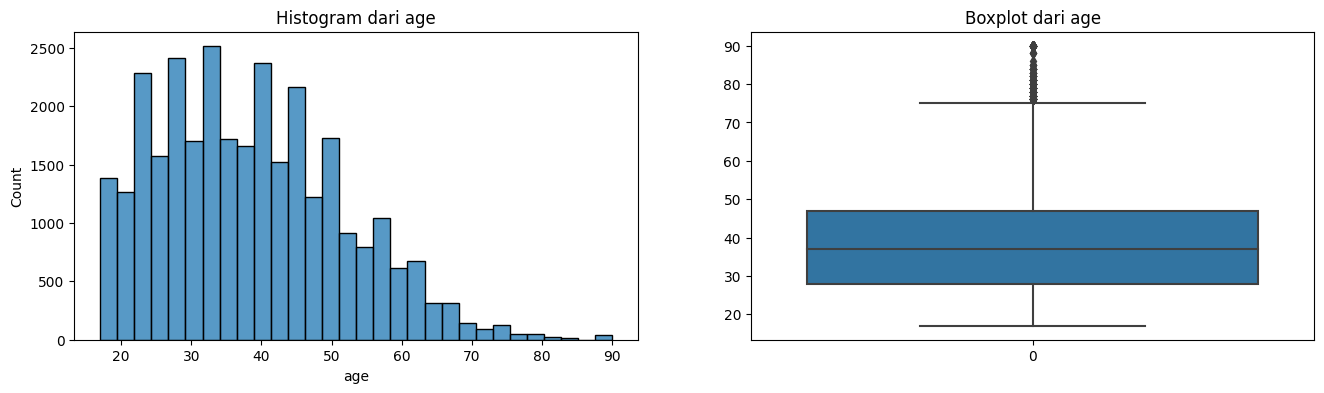

In [181]:
print('Skewness Value age: ', BigQuery['age'].skew().round(decimals=2));

plt.figure(figsize=(16, 4));

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(BigQuery['age'].astype(float), bins=30)
plt.title('Histogram dari age')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(BigQuery['age'].astype(float))
plt.title('Boxplot dari age')

plt.show();

In [182]:
# Membuat nilai 25 quantil yang disebut Q1 dan 75 quantil yang disebut Q3
Q1 = BigQuery['age'].quantile(0.25)
Q3 = BigQuery['age'].quantile(0.75)
print ('Nilai Q1: ', Q1)
print ('Nilai Q3: ', Q3)

# Membuat nilai IQR, dari Q3 - Q1
IQR = Q3 - Q1
print ('Nilai IQR: ', IQR)

# Membuat nilai batas bawah dengan rumus Q1 - (IQR * 1.5)
BatasBawah = Q1 - (IQR * 1.5)

# Membuat nilai batas atas dengan rumus Q3 + (IQR * 1.5)
BatasAtas = Q3 + (IQR * 1.5)

print ('Nilai Batas Bawah: ', BatasBawah)
print ('Nilai Batas Atas: ', BatasAtas)

# Menghilangkan angka-angka yang berada diluar batas bawah maupun batas atas
X_train = X_train[(X_train['age'] > BatasBawah) & (X_train['age'] < BatasAtas)]
X_test = X_test[(X_test['age'] > BatasBawah) & (X_test['age'] < BatasAtas)]

# Menampilkan jumlah nilai, sebelum dan sesudah dihilangkan datanya
print (BigQuery['age'].shape[0])    #Nilai sebelum
print (y_train.shape[0]) #Nilai setelah

print('Skewness Value age: ', X_train['age'].skew().round(decimals=2))
print('Skewness Value age: ', X_test['age'].skew().round(decimals=2));

Nilai Q1:  28.0
Nilai Q3:  47.0
Nilai IQR:  19.0
Nilai Batas Bawah:  -0.5
Nilai Batas Atas:  75.5
30725
24580
Skewness Value age:  0.41
Skewness Value age:  0.41


### Mengecek outlier pada `hours_per_week`

Skewness Value hours_per_week:  0.37


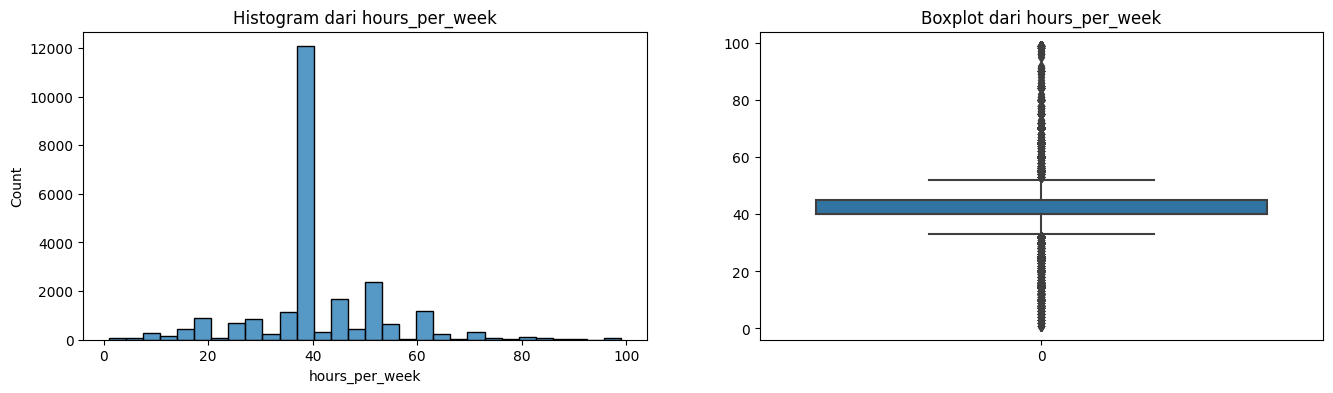

In [183]:
print('Skewness Value hours_per_week: ', X_train['hours_per_week'].skew().round(decimals=2));

plt.figure(figsize=(16, 4));

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['hours_per_week'].astype(float), bins=30)
plt.title('Histogram dari hours_per_week')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(X_train['hours_per_week'].astype(float))
plt.title('Boxplot dari hours_per_week')

plt.show();

## Feature Selection

In [184]:
# Menghilangkan data di y_train yang hilang saat outlier pada X_train
y_train = y_train.filter(items=X_train.index,axis=0)
y_test = y_test.filter(items=X_test.index,axis=0)

### Split Numeric dan Category

In [185]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(exclude=np.number).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Cat Columns :  ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


### Split pada data freatures

In [186]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

print (X_train_num.shape)
print (X_train_cat.shape)

print (X_test_num.shape)
print (X_test_cat.shape)

(24442, 5)
(24442, 8)
(6111, 5)
(6111, 8)


## Feature Scaling

In [187]:
# Menggunakan MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.63793103, 0.53333333, 0.        , 0.        , 0.39795918],
       [0.22413793, 0.8       , 0.        , 0.        , 0.7244898 ],
       [0.84482759, 0.53333333, 0.        , 0.        , 0.39795918],
       ...,
       [0.31034483, 0.53333333, 0.        , 0.        , 0.39795918],
       [0.27586207, 0.33333333, 0.        , 0.        , 0.34693878],
       [0.51724138, 0.6       , 0.        , 0.        , 0.39795918]])

## Feature Encoding

In [188]:
X_train_cat

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
4311,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Black,Male,United-States
21032,Private,Bachelors,Never-married,Tech-support,Not-in-family,White,Female,United-States
11337,Private,HS-grad,Widowed,Adm-clerical,Not-in-family,White,Female,United-States
26207,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
3403,Private,7th-8th,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...
2100,State-gov,11th,Divorced,Other-service,Unmarried,White,Female,United-States
24285,Private,Some-college,Married-civ-spouse,Sales,Husband,Black,Male,United-States
6578,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
1054,Private,10th,Never-married,Craft-repair,Unmarried,White,Female,United-States


In [189]:
# Menggunakan Encoder
encoder = OneHotEncoder()

X_train_cat_encoded = encoder.fit_transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
feature_names = encoder.get_feature_names_out().tolist()

X_train_cat_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

## Concate Numeric dan Category

In [190]:
print(X_train_num_scaled.shape)
print(X_train_cat_encoded.shape)

(24442, 5)
(24442, 101)


In [191]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final.shape

(24442, 106)

In [192]:
# Membuat dataframe `X_train_final`

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + feature_names])
X_train_final_df

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.637931,0.533333,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.224138,0.800000,0.00000,0.0,0.724490,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.844828,0.533333,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.465517,0.600000,0.00000,0.0,0.500000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.120690,0.200000,0.02105,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24437,0.155172,0.400000,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24438,0.706897,0.600000,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24439,0.310345,0.533333,0.00000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24440,0.275862,0.333333,0.00000,0.0,0.346939,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# vi - Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## Logistic Regression

In [193]:
# Mendefinisikan model Logistik Regression
model_log_reg = LogisticRegression(solver="lbfgs", random_state=1509)

## Support Vector Machine

In [194]:
# Mendefinisikan model SVM dengan SVC menggunakan kernel "Linear"
model_svc = SVC (kernel="linear")

# vii - Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [195]:
# Mentraining model Logistik Regression
model_log_reg.fit(X_train_final, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1509)

In [196]:
# Mentraining model SVC
model_svc.fit(X_train_final, y_train)

SVC(kernel='linear')

#ix - Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.



## Logistic Regression

In [197]:
# Membuat prediksi Logistic Regression
y_pred_log_reg_train = model_log_reg.predict(X_train_final)
y_pred_log_reg_test = model_log_reg.predict(X_test_final)

y_pred_log_reg_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [198]:
# Memperlihatkan confusion_matrix
cm_train_log_reg = confusion_matrix(y_train, y_pred_log_reg_train)
print('Confusion Matrix Data Train: \n', cm_train_log_reg)
print(classification_report(y_train, y_pred_log_reg_train))

cm_test_log_reg = confusion_matrix(y_test, y_pred_log_reg_test)
print('Confusion Matrix Data Test: \n', cm_test_log_reg)
print(classification_report(y_test, y_pred_log_reg_test))

Confusion Matrix Data Train: 
 [[17011  1324]
 [ 2475  3632]]
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     18335
        >50K       0.73      0.59      0.66      6107

    accuracy                           0.84     24442
   macro avg       0.80      0.76      0.78     24442
weighted avg       0.84      0.84      0.84     24442

Confusion Matrix Data Test: 
 [[4289  309]
 [ 581  932]]
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4598
        >50K       0.75      0.62      0.68      1513

    accuracy                           0.85      6111
   macro avg       0.82      0.77      0.79      6111
weighted avg       0.85      0.85      0.85      6111



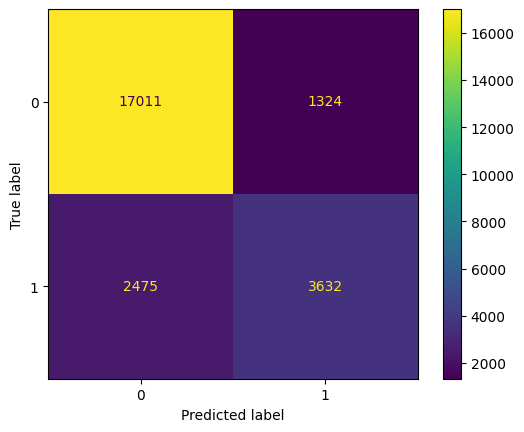

In [199]:
ConfusionMatrixDisplay(cm_train_log_reg).plot()

## Support Vector Machine


In [200]:
# Membuat prediksi Vector Machine menggunakan SVC
y_pred_svc_train = model_svc.predict(X_train_final)
y_pred_svc_test = model_svc.predict(X_test_final)

y_pred_svc_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [201]:
# Memperlihatkan confusion_matrix
cm_train_svc = confusion_matrix(y_train, y_pred_svc_train)
print('Confusion Matrix Data Train: \n', cm_train_svc)
print(classification_report(y_train, y_pred_svc_train))

cm_train_svc = confusion_matrix(y_test, y_pred_svc_test)
print('Confusion Matrix Data Test: \n', cm_train_svc)
print(classification_report(y_test, y_pred_svc_test))

Confusion Matrix Data Train: 
 [[17135  1200]
 [ 2609  3498]]
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     18335
        >50K       0.74      0.57      0.65      6107

    accuracy                           0.84     24442
   macro avg       0.81      0.75      0.77     24442
weighted avg       0.84      0.84      0.84     24442

Confusion Matrix Data Test: 
 [[4321  277]
 [ 586  927]]
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4598
        >50K       0.77      0.61      0.68      1513

    accuracy                           0.86      6111
   macro avg       0.83      0.78      0.80      6111
weighted avg       0.85      0.86      0.85      6111



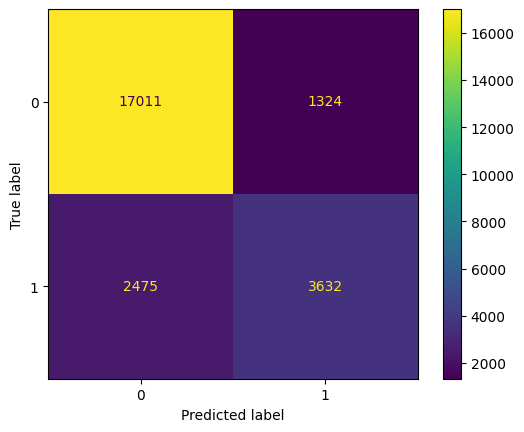

In [202]:
ConfusionMatrixDisplay(cm_train_log_reg).plot()

# ix - Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

saving logistik dan svm

In [203]:
# Save the Files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model_log_reg.pkl', 'wb') as file_5:
  pickle.dump(model_log_reg, file_5)

with open('model_svc.pkl', 'wb') as file_6:
  pickle.dump(model_svc, file_6)

# x - Model Inference
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [204]:
# Load All Files

with open('model_log_reg.pkl', 'rb') as file_1:
  model_log_reg = pickle.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = pickle.load(file_2)

with open('model_encoder.pkl','rb') as file_3:
  model_encoder = pickle.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('list_cat_cols.txt', 'r') as file_5:
  list_cat_cols = json.load(file_5)

with open('model_svc.pkl', 'rb') as file_6:
  model_svc.pkl = pickle.load(file_6)

In [205]:
X_train_num.nunique()
X_train_num["education_num"].unique()

<IntegerArray>
[9, 13, 10, 4, 16, 12, 6, 14, 11, 3, 1, 15, 7, 2, 5, 8]
Length: 16, dtype: Int64

In [206]:
# Create New Data

data_inf = {
    "age"           : 29,
    "education_num" : 10,
    "capital_gain"  : 5000,
    "capital_loss"  : 2000,
    "hours_per_week": 80,
    "workclass"     : " Private",
    "education"     : " Bachelors",
    "marital_status": " Never-married",
    "occupation"    : " Prof-specialty",
    "relationship"  : " Not-in-family",
    "race"          : " White",
    "sex"           : " Male",
    "native_country": " United-States"
}

data_inf = pd.DataFrame([data_inf])
data_inf

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,29,10,5000,2000,80,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,United-States


In [207]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]

In [208]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat).toarray()
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)

In [209]:
y_pred_log_reg_train_inf = model_log_reg.predict(data_inf_final)
y_pred_log_reg_test_inf = model_log_reg.predict(data_inf_final)

y_pred_log_reg_train_inf

array([' >50K'], dtype=object)

In [210]:
y_pred_svc_train_inf = model_svc.predict(data_inf_final)
y_pred_svc_test_inf = model_svc.predict(data_inf_final)

y_pred_svc_train_inf

array([' >50K'], dtype=object)

# xi - Pengambilan Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Berdasarkan hasil pengerjaan, dapat disimpulkan bahwa:
1. Dari EDA, terlihat bahwa
  - `race` terbanyak adalah 'white' yang sangat mendominasi
  - `sex` lebih banyak yang berjenis 'male' dibandingkan 'female'
  - `relationship` bertipe 'husband' lebih banyak dibandingkan tipe lainnya, diikuiti tipe 'Not in family'
  - `workclass` paling banyak adalah bertipe 'Private'
  - `education` terbanyak adalah 'HS-grade', diikuti oleh 'Some-College' dan 'Bachelors'
  - `marital_status` paling sedikit adalah 'married-af-spouse' dan paling banyak adalah 'married-civ-spouse'
  - `age` banyak pada rata-rata 30-40
  - `education_num` terbanyak pada angka 9
  - `income_bracket` lebih dominan yang <= 50k sebesar 75%.
2. Berdasarkan Model Evaluation:
  1. Model Logistic Regression
      - nilainya cukup tinggi yang artinya nilainya bagus kecuali pada kategori >50k yang tidak terlalu tinggi
  2. Model SVM
      - nilainya cukup tinggi yang artinya nilainya bagus kecuali pada kategori >50k yang tidak terlalu tinggi

## Conceptual Problems

1. Apakah yang dimaksud dengan `coeficient` pada logistic regression?
> `coeficient` adalah margin yang mengizinkan kesalahan pada outlier, semakin kecil nilai C nya semakin besar regularisasinya/margin, ketika nilainya kecil kemungkinan cenderung underfit, sedangkan nilainya besar cenderung overfit.

2. Apakah yang dimaksud dengan `Support Vector` pada SVM?
> `Support Vector` adalah Titik data yang dekat dengan hyperplane yang dimana hyperlane merupakan garis pembatas antara dua kategori yang ingin diprediksi

3. Apakah fungsi parameter `kernel` pada SVM? Jelaskan salah satu kernel yang kalian pahami!
> Fungsi `kernel` adalah untuk memproyeksikan data-data yang tidak dapat dipisahkan secara linear yang terjadi pada dimensi yang rendah dan dirubah ke dimensi yang lebih tinggi, salah satunya adalah kernel linear yang merupakan kernel berbentuk linear, dapat digunakan untuk klasifikasi dan yang tercepat dalam pembentukannya, karena terbagi secara garis lurus

In [211]:
# Get Intercept and Slope

print('Intercept : ', model_log_reg.intercept_)
print('Slope : ', model_log_reg.coef_)

Intercept :  [-4.50197377]
Slope :  [[ 1.55844279e+00  1.98001351e+00  1.59059023e+01  2.31146242e+00
   2.80975223e+00  4.47723205e-01 -2.03943671e-01 -2.89814973e-02
  -2.90359341e-04  1.23698649e-01 -4.96952365e-01 -3.66266431e-01
  -9.42664918e-01 -4.12578656e-01 -5.16497258e-01 -2.71251905e-01
  -2.44689566e-01 -6.12027512e-01 -6.27806635e-01 -4.73538282e-01
  -8.38188778e-02  1.13317806e-01  4.41094605e-01  9.13069839e-01
  -1.58329722e-01  6.74613650e-01 -1.33251719e+00  1.03878534e+00
   8.44969738e-02 -7.77585868e-01  1.41238919e+00  1.16471536e+00
  -6.84874374e-01 -1.21473170e+00 -8.40277397e-01 -5.27312594e-01
  -2.89814973e-02  8.31634272e-02 -3.42861913e-01  1.16354245e-01
   8.06770506e-01 -8.42625134e-01 -6.81604400e-01 -2.47051814e-01
  -7.72822726e-01 -1.47290960e+00  5.42307351e-01  6.23422680e-01
   2.56593015e-01  5.92227597e-01 -9.96591190e-02 -3.58661024e-01
   5.97560908e-03 -8.35473726e-01 -1.04501408e+00 -1.29210232e-01
   8.94706069e-01 -6.63325215e-01 -7.846

In [212]:
# Get Intercept and Slope

print('Intercept : ', model_svc.intercept_)
print('Slope : ', model_svc.coef_)

Intercept :  [-4.00192147]
Slope :  [[ 7.68278822e-01  1.50250194e+00  1.59533106e+01  1.74064672e+00
   1.59576634e+00  4.28955068e-01 -1.29680154e-02  0.00000000e+00
   1.07414520e-01  2.33425476e-01 -2.49435677e-01 -1.47033741e-01
  -3.60357630e-01 -1.23783643e-01 -1.63473048e-01 -2.33899053e-01
   1.00514518e-01 -8.76564720e-03 -1.98849355e-01 -5.27598830e-02
  -1.32676748e-01 -2.84637988e-02  4.40441995e-01  6.40242406e-01
  -2.14566847e-01  4.99302879e-01 -1.11358715e+00  6.53402511e-01
  -6.30791388e-02 -2.99678108e-01  9.14385495e-01  7.07430252e-01
  -3.30432133e-01 -5.90013886e-01 -2.98363249e-01 -1.03328372e-01
   0.00000000e+00  1.00494731e-01 -1.28561202e-01 -4.49806041e-02
   7.24498282e-01 -4.27248166e-01 -2.81942778e-01 -1.51283897e-01
  -3.13698988e-01 -1.00000000e+00  5.16567711e-01  3.61327111e-01
   1.77649927e-01  6.01942436e-01 -1.34764563e-01  1.18994490e-01
  -1.08640918e-01 -3.16293071e-01 -3.02786035e-01 -1.31690293e-01
   7.40415828e-01 -2.90370046e-01  1.914

In [213]:
# List All Columns

X_train_final_df.columns

MultiIndex([(                            'age',),
            (                  'education_num',),
            (                   'capital_gain',),
            (                   'capital_loss',),
            (                 'hours_per_week',),
            (         'workclass_ Federal-gov',),
            (           'workclass_ Local-gov',),
            (        'workclass_ Never-worked',),
            (             'workclass_ Private',),
            (        'workclass_ Self-emp-inc',),
            ...
            (       'native_country_ Portugal',),
            (    'native_country_ Puerto-Rico',),
            (       'native_country_ Scotland',),
            (          'native_country_ South',),
            (         'native_country_ Taiwan',),
            (       'native_country_ Thailand',),
            ('native_country_ Trinadad&Tobago',),
            (  'native_country_ United-States',),
            (        'native_country_ Vietnam',),
            (     'native_country_